## 1. Implement Matrix Factorization using numpy (70 points)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def matrix_factorization(A, K, steps, alpha, beta):
    """
    A: user-item rating matrix
    K: number of latent features
    steps: number of iterations to perform the optimization
    alpha: learning rate
    beta: regularization parameter
    """
    tol=0.001
    ite = 0
    m, n = A.shape
    C = np.random.rand(m,K)
    U = np.random.rand(n,K)
    J_list=[]
    error_list=[]
    for step in range(steps):
        E = A-(C @ U.T)
        J = (E**2).sum()+beta*((C**2).sum()+(U**2).sum())
        
        grad_C = 2*E @ U- beta*C
        grad_U = 2*E.T @ C- beta*U
        C = C + alpha*grad_C
        U = U + alpha*grad_U
        ite +=1
        J_list.append(J)
        error_list.append((E**2).sum())
        if J <= tol:
            break
    return C, U, J_list, error_list, ite
    

In [3]:
# show the results of A
A = np.array([[5, 3, 0, 1],
              [4, 0, 0, 1],
              [1, 1, 0, 5],
              [1, 0, 0, 4],
              [0, 1, 5, 4]])


C, U, J_list, error_list, ite = matrix_factorization(A,3,1000,1e-03,0.04)
print('C:\n')
print(C)
print()
print('U:\n')
print(U)
print()
print('C @ U:\n')
print(C@U.T)

C:

[[-0.3438918  -0.18912095  2.20663139]
 [-0.04581021 -0.26869227  1.44495712]
 [ 1.80658057  0.05964305  0.86544602]
 [ 1.46929431 -0.0033509   0.64946485]
 [ 0.62701422  2.24984702  0.58397534]]

U:

[[-0.43857285 -0.48647861  2.29792788]
 [-0.16131735  0.26963234  0.96952374]
 [-0.14036371  2.18621154  0.23474457]
 [ 2.30682231  0.89692784  0.90220505]]

C @ U:

[[ 5.31350469  2.1438641   0.15280625  1.02790884]
 [ 3.47121141  1.33586208 -0.24179221  0.95697402]
 [ 1.16740028  0.56371937  0.07997274  5.00176566]
 [ 0.84966095  0.39174541 -0.06110303  3.97234584]
 [-0.02756065  1.07166121  4.96771653  3.99122632]]


In [10]:
print(ite)

1000


In [4]:
((A-C@U.T)**2).sum()

3.392183272527852

## 2. Plot the error of SGD (10 points)


Text(0, 0.5, 'L(C,U)')

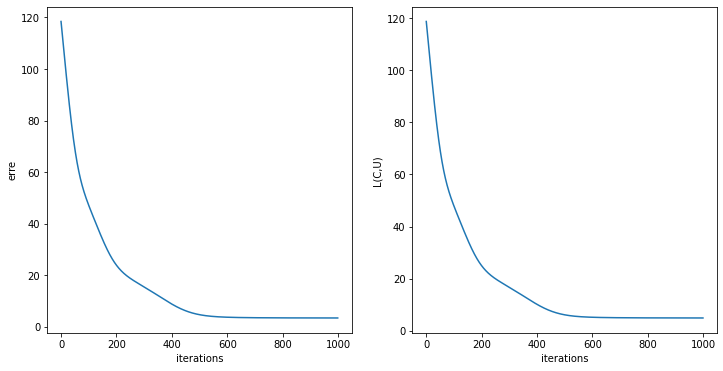

In [5]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot([i for i in range(ite)], error_list)
plt.xlabel('iterations')
plt.ylabel('erre')

plt.subplot(122)
plt.plot([i for i in range(ite)], J_list)
plt.xlabel('iterations')
plt.ylabel('L(C,U)')

* Ref: https://everdark.github.io/k9/notebooks/ml/matrix_factorization/matrix_factorization.nb.html

## 3. Compare the results with NMF from sklearn (10 points)

In [6]:
from sklearn.decomposition import non_negative_factorization
W, H, n_iter = non_negative_factorization(A,n_components=3, init='random', random_state=0, tol=0.001 )

In [7]:
print('W:\n')
print(W)
print()
print('H:\n')
print(H)
print()
print('W @ H:\n')
print(W@H)

W:

[[0.08680974 2.03338616 0.52170927]
 [0.         1.31721999 0.59967101]
 [0.04447748 0.42614869 3.42359846]
 [0.         0.304912   2.75734728]
 [2.62443471 0.         0.91745677]]

H:

[[0.         0.38384211 1.90254413 1.02098029]
 [2.62030274 1.02901848 0.         0.08632913]
 [0.015038   0.03054444 0.         1.4386465 ]]

W @ H:

[[5.3359328  2.1416485  0.16515937 1.0147267 ]
 [3.46053299 1.37376033 0.         0.97642905]
 [1.16812266 0.56015912 0.08462036 5.0075476 ]
 [0.84042674 0.39798172 0.         3.9931708 ]
 [0.01379671 1.03539176 4.99310284 3.99939208]]


In [8]:
print(n_iter)

20


In [9]:
((A-W@H)**2).sum()

3.470243704296629

* Ref: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.non_negative_factorization.html

## 4. Explain the differences and why (10 points)

NFM achieved lower error with fewer iterations compared to my self-defined function. I got different results for decomposed matrix and the NMF method got the same results in several runs. The difference is the way to initialize the C (W) and U (H). NMF utilized `sqrt(X.mean() / n_components)` to scale the initial random matrix. The randomized initialized matrix might cause the cost function not to converge to a minimum. A rescale factor makes sure the random values in W and H are proportional to the entries in A, avoiding some elements in A being much larger than others, which can lead to numerical instability.